In [7]:
import pandas as pd
import numpy as np

In [4]:
df_kpi = pd.read_csv("5 run ACG attack 1/5 run KPIs 1.csv",index_col=0)

In [3]:
df_kpi

,0,1,2,3,4,mean,std,variance
cost_function,,,,,,,,
annual_peak_average,1.340799,1.198347,1.198347,1.336635,1.198347,1.254495,0.076898,5.913313e-03
carbon_emissions_total,0.905305,0.905949,0.903067,0.906009,0.904669,0.905000,0.001210,1.464550e-06
cost_total,0.821299,0.820694,0.819520,0.823444,0.820695,0.821130,0.001445,2.089429e-06
daily_one_minus_load_factor_average,0.340251,0.365851,0.352087,0.388326,0.382779,0.365859,0.020227,4.091320e-04
daily_peak_average,0.964378,0.981558,0.978818,0.975169,0.965866,0.973158,0.007696,5.922986e-05
electricity_consumption_total,0.913364,0.913713,0.911322,0.913760,0.912735,0.912979,0.001013,1.026025e-06
monthly_one_minus_load_factor_average,1.003274,0.996344,0.998209,1.002030,0.999535,0.999879,0.002809,7.888547e-06
ramping_average,1.289508,1.293732,1.277046,1.286056,1.275453,1.284359,0.007906,6.251002e-05
zero_net_energy,1.108946,1.108697,1.108445,1.108554,1.108754,1.108679,0.000192,3.693766e-08


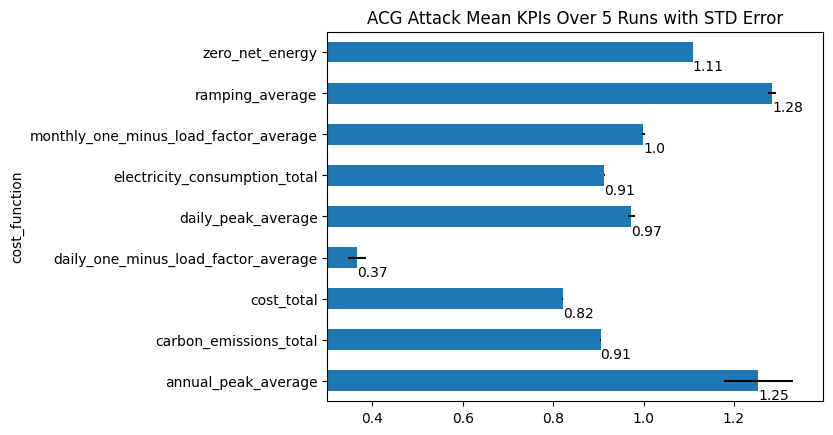

In [6]:
ax = df_kpi['mean'].plot.barh(xerr = df_kpi['std'], xlim=0.3, title='ACG Attack Mean KPIs Over 5 Runs with STD Error', ylabel='Normalized KPI')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), 
            i.get_y()-0.2,
            str(round((i.get_width()), 2)), 
            fontsize=10, 
            #color='dimgrey'
            )
ax.set_ylabel ='Normalized KPI'

In [13]:
df_kpi['baseline'] = pd.read_csv('KPIs.csv', usecols=['baseline']).values

In [14]:
df_kpi['baseline']

cost_function
annual_peak_average                      1.102271
carbon_emissions_total                   0.869186
cost_total                               0.787803
daily_one_minus_load_factor_average      1.095762
daily_peak_average                       0.894595
electricity_consumption_total            0.879108
monthly_one_minus_load_factor_average    0.988364
ramping_average                          1.093749
zero_net_energy                          1.107710
Name: baseline, dtype: float64

In [22]:
df_kpi.index

Index(['annual_peak_average', 'carbon_emissions_total', 'cost_total',
       'daily_one_minus_load_factor_average', 'daily_peak_average',
       'electricity_consumption_total',
       'monthly_one_minus_load_factor_average', 'ramping_average',
       'zero_net_energy'],
      dtype='object', name='cost_function')

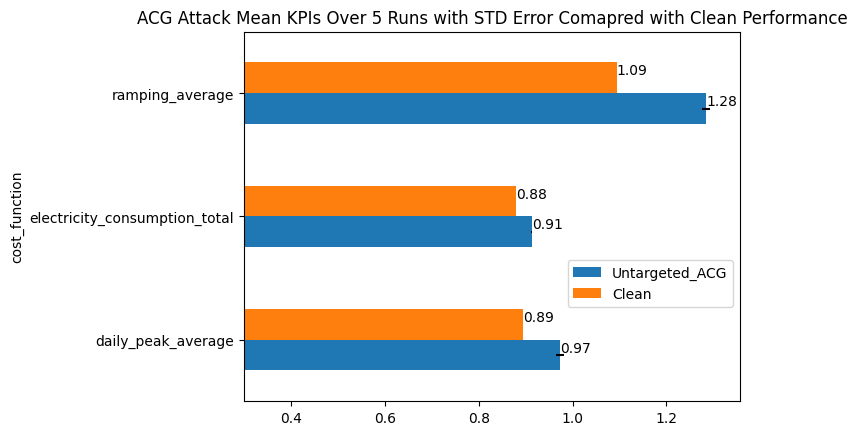

In [36]:
rows = ['daily_peak_average','electricity_consumption_total','ramping_average']
ax = df_kpi[['mean','baseline']].loc[rows].plot.barh(
                                            xerr = [df_kpi['std'].loc[rows], np.zeros(df_kpi['std'].loc[rows].shape)], 
                                           xlim=0.3, 
                                           title='ACG Attack Mean KPIs Over 5 Runs with STD Error Comapred with Clean Performance', 
                                           ylabel='Normalized KPI')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), 
            i.get_y() + 0.15,
            str(round((i.get_width()), 2)), 
            fontsize=10, 
            #color='dimgrey'
            )
ax.set_ylabel ='Normalized KPI'
ax.legend(bbox_to_anchor=(1.0, .4), labels=['Untargeted_ACG', 'Clean'])